<a href="https://colab.research.google.com/github/vladgap/Various/blob/main/SVR_function_approx2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn import preprocessing
import matplotlib.pyplot as plt
import skimage.io as sio

In [2]:
from sklearn.svm import SVR

# 1

In [3]:
def func(x):
    y = x**2+1
    return y

In [4]:
x=np.linspace(-1,2,16)
data1=np.array([
               x,
               func(x)
               ]).T
X1=data1[:,[0]]
T1=data1[:,[1]]

In [5]:
scaler_X1 = preprocessing.StandardScaler().fit(X1)
scaler_T1 = preprocessing.StandardScaler().fit(T1)

scaler_X1.mean_, scaler_X1.scale_ = 0, 1 # disable scaling
scaler_T1.mean_, scaler_T1.scale_ = 0, 1 # disable scaling

scaler_data1 = [scaler_X1.mean_, scaler_X1.scale_, scaler_T1.mean_, scaler_T1.scale_]
print('scaler X -- mean, stdev:  ',scaler_data1[0], scaler_data1[1])
print('scaler T -- mean, stdev:  ',scaler_data1[2], scaler_data1[3])

X_sc1 = scaler_X1.transform(X1)
T_sc1 = scaler_T1.transform(T1)
X_sc1[0:3]

scaler X -- mean, stdev:   0 1
scaler T -- mean, stdev:   0 1


array([[-1. ],
       [-0.8],
       [-0.6]])

## 1_1

In [209]:
svr1=SVR(kernel='sigmoid', coef0=1)
svr1.fit(X_sc1,T_sc1.ravel())
predics1=scaler_T1.inverse_transform(svr1.predict(X_sc1).reshape(-1,1))
# predics1

(array([3., 3., 2., 1., 0., 2., 1., 0., 2., 2.]),
 array([-124.87643683,  -84.53838915,  -44.20034146,   -3.86229378,
          36.47575391,   76.8138016 ,  117.15184928,  157.48989697,
         197.82794466,  238.16599234,  278.50404003]),
 <BarContainer object of 10 artists>)

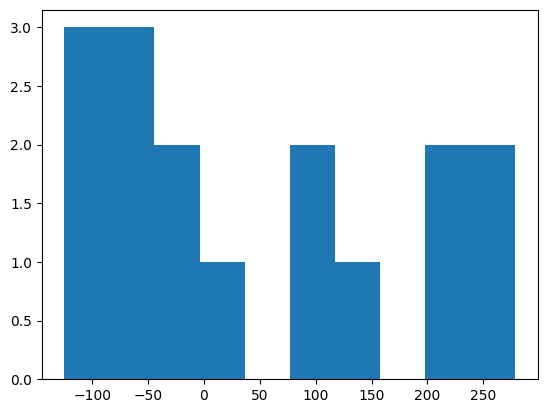

In [210]:
# @title
errors1=(predics1-T1)/T1*100
plt.hist(errors1[:,0]) # division by 0

In [206]:
# @title
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=T1[:,0], y=predics1[:,0], mode='markers', marker_size=4, name='predics', marker_color='black'),secondary_y=False)
fig.add_trace(go.Scatter(x=T1[:,0], y=T1[:,0], mode='lines', line_color='red', line_width=0.2, showlegend=False),secondary_y=False)
fig.add_trace(go.Scatter(x=T1[:,0], y=errors1[:,0], mode='markers', marker_size=4, name='errors', marker_color='orange'),secondary_y=True)

fig.update_xaxes(title_text="data")

# Set y-axes titles
fig.update_yaxes(title_text="predics", secondary_y=False)
fig.update_yaxes(title_text="% error", range=[-20, 20], secondary_y=True, showgrid=False, tick0=-5, dtick=2)

fig.show()

In [207]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=X1[:,0], y=T1[:,0], mode='markers', marker_color='blue', name='data'),secondary_y=False)
fig.add_trace(go.Scatter(x=X1[:,0], y=errors1[:,0], mode='markers', marker_size=4, marker_color='orange', name='errors'),secondary_y=True)

X_mean, X_wigth = X1[:,0].mean(), X1[:,0].max()-X1[:,0].mean()
X_extended=np.linspace(X_mean-2*X_wigth, X_mean+2*X_wigth, 51)

fig.add_trace(go.Scatter(x=X_extended, y=scaler_T1.inverse_transform(svr1.predict(scaler_X1.transform(X_extended.reshape(51,1))).reshape(-1,1))[:,0], mode='markers', marker_size=3, name='extenden prediction'),secondary_y=False)
fig.add_trace(go.Scatter(x=X1[:,0], y=predics1[:,0], mode='markers', marker_color='black', name='prediction'),secondary_y=False)

fig.update_xaxes(title_text="x_axis")

# Set y-axes titles
fig.update_yaxes(title_text="data, predics", secondary_y=False)
fig.update_yaxes(title_text="% error", range=[-20, 20], secondary_y=True, showgrid=False, tick0=-5, dtick=2)

fig.show()

In [208]:
svr_temp=svr1
df=pd.concat([pd.DataFrame(svr_temp.dual_coef_.T, columns=['dual_coef_']),
              pd.DataFrame(svr_temp.support_vectors_),
              ],axis=1).rename(columns={0: "support_vectors_"}).set_index('dual_coef_')
display(df)
print (' gamma: ',svr_temp.gamma,'\n',
       'coef0: ',svr_temp.coef0,'\n',
       'degree: ',svr_temp.degree,'\n',
       'Intercept: ',svr_temp.intercept_[0],)

,support_vectors_
dual_coef_,
0.154896,-1.0
-0.817368,-0.4
-0.581260,0.2
-0.756269,1.2
1.000000,1.8
1.000000,2.0


 gamma:  scale 
 coef0:  1 
 degree:  3 
 Intercept:  2.389515713209634


## 1_2

In [131]:
svr1_2=SVR(kernel='poly',degree=2,coef0=1, gamma=1)
svr1_2.fit(X_sc1,T_sc1.ravel())
predics1_2=scaler_T1.inverse_transform(svr1_2.predict(X_sc1).reshape(-1,1))
# predics1_2

In [132]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=X1[:,0], y=T1[:,0], mode='markers', marker_color='blue', name='data'),secondary_y=False)
# fig.add_trace(go.Scatter(x=X1[:,0], y=errors1[:,0], mode='markers', marker_size=4, marker_color='orange', name='errors'),secondary_y=True)

X_mean, X_wigth = X1[:,0].mean(), X1[:,0].max()-X1[:,0].mean()
X_extended=np.linspace(X_mean-2*X_wigth, X_mean+2*X_wigth, 51)

fig.add_trace(go.Scatter(x=X_extended, y=scaler_T1.inverse_transform(svr1_2.predict(scaler_X1.transform(X_extended.reshape(-1,1))).reshape(-1,1))[:,0], mode='markers', marker_size=3, name='extenden prediction'),secondary_y=False)
fig.add_trace(go.Scatter(x=X1[:,0], y=predics1_2[:,0], mode='markers', marker_color='black', name='prediction'),secondary_y=False)

fig.update_xaxes(title_text="x_axis")

# Set y-axes titles
fig.update_yaxes(title_text="data, predics", secondary_y=False)
fig.update_yaxes(title_text="% error", range=[-20, 20], secondary_y=True, showgrid=False, tick0=-5, dtick=2)

fig.show()

In [158]:
svr_temp=svr1_2
df=pd.concat([pd.DataFrame(svr_temp.dual_coef_.T, columns=['dual_coef_']),
              pd.DataFrame(svr_temp.support_vectors_),
              ],axis=1).rename(columns={0: "support_vectors_"}).set_index('dual_coef_')
display(df)
print (' gamma: ',svr_temp.gamma,'\n',
       'coef0: ',svr_temp.coef0,'\n',
       'degree: ',svr_temp.degree,'\n',
       'Intercept: ',svr_temp.intercept_[0],)

,support_vectors_
dual_coef_,
0.174256,-1.0
-0.127689,0.4
-0.259219,0.6
0.212652,2.0


 gamma:  1 
 coef0:  1 
 degree:  2 
 Intercept:  1.078217677277998


manual predict

In [134]:
scaler_T1.inverse_transform(svr1_2.predict([[1]]).reshape(-1,1))

array([[2.07821769]])

In [188]:
regressor=svr1_2

# Extract the parameters
support_vectors = regressor.support_vectors_
coefficients = regressor.dual_coef_
intercept = regressor.intercept_
gamma = regressor.gamma
degree = regressor.degree

def polynomial_kernel(x, sv, degree, r=1, gamma=1):
    return (gamma * np.dot(sv, x) + r) ** degree
def manual_pred(x, sv, coefficients, intercept, degree, r=1, gamma=1):
    kernel = polynomial_kernel(x, sv, degree, r, gamma)
    # print (kernel)
    y = np.sum(coefficients.ravel() * kernel) + intercept
    return y
x = [1]  # replace this with your instance
manual_pred(x, support_vectors, coefficients, intercept, degree=degree)

array([2.07821769])

# 2

In [16]:
data2=[
[0.32,	0.99,	0.77,	0.69,	0.04,	0.37,	0.25,	0.44,	0.42,	0.64,	0.8,],
[0.4,	0.23,	0.22,	0.57,	0.78,	0.69,	0.2,	0.45,	0.17,	0.98,	0.96,],
[4.952768,	5.924299,	5.412533,	5.214509,	4.844064,	4.912653,	4.975625,	4.995184,	5.040088,	5.066144,	5.32,],
]
data2=np.array(data2).T
X2=data2[:,[0,1]]
T2=data2[:,[2]]

In [17]:
scaler_X2 = preprocessing.StandardScaler().fit(X2)
scaler_T2 = preprocessing.StandardScaler().fit(T2)

scaler_X2.mean_, scaler_X2.scale_ = 0, 1 # disable scaling
scaler_T2.mean_, scaler_T2.scale_ = 0, 1 # disable scaling

scaler_data2 = [scaler_X2.mean_, scaler_X2.scale_, scaler_T2.mean_, scaler_T2.scale_]
print('scaler X -- mean, stdev:  ',scaler_data2[0], scaler_data2[1])
print('scaler T -- mean, stdev:  ',scaler_data2[2], scaler_data2[3])

X_sc2 = scaler_X2.transform(X2)
T_sc2 = scaler_T2.transform(T2)
X_sc2[0:3]

scaler X -- mean, stdev:   0 1
scaler T -- mean, stdev:   0 1


array([[0.32, 0.4 ],
       [0.99, 0.23],
       [0.77, 0.22]])

In [146]:
# svr2=SVR(kernel='rbf', gamma=.1)
# svr2=SVR(kernel='sigmoid')
svr2=SVR(kernel='poly', degree=2, coef0=1, gamma=1)
svr2.fit(X_sc2,T_sc2.ravel())
predics2=scaler_T2.inverse_transform(svr2.predict(X_sc2).reshape(-1,1))
# predics2

In [70]:
x_mesh, y_mesh = np.linspace(-1, 2, 31), np.linspace(-1, 2, 31)
# x_mesh, y_mesh = np.arange(-1, 2, 0.1), np.arange(-1, 2, 0.1)
x_mesh, y_mesh = np.meshgrid(x_mesh, y_mesh)
x_mesh = x_mesh.flatten().reshape(31*31,1)
y_mesh = y_mesh.flatten().reshape(31*31,1)
mesh2=np.concatenate((x_mesh, y_mesh), axis=1)
# x_mesh[:5]
mesh_predics2=scaler_T2.inverse_transform(svr2.predict(scaler_X2.transform(mesh2)).reshape(-1,1))

In [159]:
fig=go.Figure()
fig.add_trace(go.Scatter3d(x=data2[:,0], y=data2[:,1], z=data2[:,2], mode='markers', name='data'))
fig.add_trace(go.Scatter3d(x=data2[:,0], y=data2[:,1], z=predics2[:,0], mode='markers', name='predics'))
fig.add_trace(go.Scatter3d(x=x_mesh[:,0], y=y_mesh[:,0], z=mesh_predics2[:,0], mode='markers', marker_size=2, name='mesh-predics'))
x=np.linspace(0, 1, 11)
y=np.linspace(0, 1, 11)
x, y = np.meshgrid(x,y)
z=x**3-.2*y+5
fig.add_trace(go.Surface(x=x, y=y, z=z, colorbar_x=0, opacity=0.5, showlegend=True, name='data surface'))
fig.update_scenes(camera_projection_type="orthographic")

fig.show()

In [157]:
svr_temp=svr2
df=pd.concat([pd.DataFrame(svr_temp.dual_coef_.T, columns=['dual_coef_']),
              pd.DataFrame(svr_temp.support_vectors_),
              ],axis=1).rename(columns={0: "support_vectors_"}).set_index('dual_coef_')
display(df)
print (' gamma: ',svr_temp.gamma,'\n',
       'coef0: ',svr_temp.coef0,'\n',
       'degree: ',svr_temp.degree,'\n',
       'Intercept: ',svr_temp.intercept_[0],)

,support_vectors_,1
dual_coef_,,
1.000000,0.99,0.23
-0.160887,0.77,0.22
-0.637126,0.69,0.57
0.213034,0.04,0.78
-0.415021,0.42,0.17


 gamma:  1 
 coef0:  1 
 degree:  2 
 Intercept:  4.867958866698583


## manual test1

In [180]:
regressor=svr2

# Extract the parameters
support_vectors = regressor.support_vectors_
coefficients = regressor.dual_coef_
intercept = regressor.intercept_
gamma = regressor.gamma
degree = regressor.degree

def polynomial_kernel(x, sv, degree, r=1, gamma=1):
    return (gamma * np.dot(sv, x) + r) ** degree
def manual_pred(x, sv, coefficients, intercept, degree, r=1, gamma=1):
    kernel = polynomial_kernel(x, sv, degree, r, gamma)
    y = np.sum(coefficients.ravel() * kernel) + intercept
    return y
x = [.99,.23]  # replace this with your instance
manual_pred(x, support_vectors, coefficients, intercept, degree=degree)

array([5.81335946])

# manual kernel

In [211]:
def my_kernel(X,Y):
    K = np.zeros((X.shape[0],Y.shape[0]))
    for i,x in enumerate(X):
        for j,y in enumerate(Y):
            K[i,j] = np.exp(-1*np.linalg.norm(x-y)**2)
    return K

clf=SVR(kernel=my_kernel)

# equals to:
# clf=SVR(kernel="rbf",gamma=1)